<a href="https://colab.research.google.com/github/clobos/Bioestatistica_ESALQ_Python_2025/blob/main/Bioestatistica_2025_opcao1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LCEXXXX Bioestatística

In [ ]:
import pandas as pd # Importa a biblioteca pandas para manipulação e análise de dados tabulares.
import numpy as np # Importa a biblioteca numpy para operações numéricas e matemáticas.
import matplotlib.pyplot as plt # Importa matplotlib para a criação de gráficos.
import seaborn as sns # Importa seaborn para visualizações estatísticas mais atraentes.
from scipy.stats import binom, poisson, norm # Importa funções específicas para distribuições de probabilidade.
from sklearn.linear_model import LinearRegression # Importa o modelo de Regressão Linear do scikit-learn.
from sklearn.model_selection import train_test_split # Importa a função para dividir os dados em conjuntos de treino e teste.
from sklearn.metrics import mean_squared_error, r2_score # Importa métricas para avaliar o desempenho do modelo.

#  Dados Hipotéticos (Área da Biologia)

In [ ]:
# Vamos criar um DataFrame de exemplo com dados biológicos para ilustrar os conceitos.
# Imagine que estamos estudando o crescimento de plantas sob diferentes condições.
data = {
    'Grupo_Tratamento': ['Controle', 'Nutriente A', 'Nutriente B', 'Controle', 'Nutriente A', 'Nutriente B', 'Controle', 'Nutriente A', 'Nutriente B', 'Controle', 'Nutriente A', 'Nutriente B'],
    'Altura_Planta_cm': [15.2, 22.5, 18.7, 14.8, 23.1, 19.5, 16.1, 21.9, 17.8, 15.5, 22.8, 18.2],
    'Numero_Folhas': [8, 12, 10, 7, 13, 9, 9, 11, 10, 8, 12, 9],
    'Peso_Seco_g': [3.1, 5.5, 4.2, 2.9, 5.8, 4.5, 3.3, 5.2, 4.0, 3.0, 5.7, 4.1],
    'Presenca_Doenca': [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1] # 0 = Ausente, 1 = Presente
}
df = pd.DataFrame(data)
print("--- Dados Brutos ---")
print(df)
print("\n")


--- Dados Brutos ---
   Grupo_Tratamento  Altura_Planta_cm  Numero_Folhas  Peso_Seco_g  \
0          Controle              15.2              8          3.1   
1       Nutriente A              22.5             12          5.5   
2       Nutriente B              18.7             10          4.2   
3          Controle              14.8              7          2.9   
4       Nutriente A              23.1             13          5.8   
5       Nutriente B              19.5              9          4.5   
6          Controle              16.1              9          3.3   
7       Nutriente A              21.9             11          5.2   
8       Nutriente B              17.8             10          4.0   
9          Controle              15.5              8          3.0   
10      Nutriente A              22.8             12          5.7   
11      Nutriente B              18.2              9          4.1   

    Presenca_Doenca  
0                 0  
1                 0  
2              

#  Estatística Descritiva: Gráficos e Tabelas, Medidas de Posição e de Dispersão

**Objetivo**: Resumir e descrever as características principais de um conjunto de dados.

**Importância**: Essencial para entender a distribuição dos dados, identificar padrões e anomalias e preparar o terreno para análises mais complexas ou aprendizado de máquina.

## Medidas de Posição (Tendência Central)

**Objetivo**: Indicar o valor central ou típico de um conjunto de dados."

**Importância**: Fornecem uma ideia rápida do valor predominante na distribuição.


In [ ]:
# Média
print(f"Média da Altura das Plantas: {df['Altura_Planta_cm'].mean():.2f} cm") # Calcula a média da coluna 'Altura_Planta_cm'.
print(f"Média do Número de Folhas: {df['Numero_Folhas'].mean():.2f}") # Calcula a média da coluna 'Numero_Folhas'.
print(f"Média do Peso Seco: {df['Peso_Seco_g'].mean():.2f} g\n") # Calcula a média da coluna 'Peso_Seco_g'.



Média da Altura das Plantas: 18.84 cm
Média do Número de Folhas: 9.83
Média do Peso Seco: 4.28 g



In [ ]:
# Mediana
print(f"Mediana da Altura das Plantas: {df['Altura_Planta_cm'].median():.2f} cm") # Calcula a mediana da coluna 'Altura_Planta_cm'.
print(f"Mediana do Número de Folhas: {df['Numero_Folhas'].median():.2f}") # Calcula a mediana da coluna 'Numero_Folhas'.
print(f"Mediana do Peso Seco: {df['Peso_Seco_g'].median():.2f} g\n") # Calcula a mediana da coluna 'Peso_Seco_g'.



Mediana da Altura das Plantas: 18.45 cm
Mediana do Número de Folhas: 9.50
Mediana do Peso Seco: 4.15 g



In [ ]:
# Moda (pode haver mais de uma moda ou nenhuma)
print(f"Moda do Número de Folhas:\n{df['Numero_Folhas'].mode()}\n") # Calcula a moda da coluna 'Numero_Folhas'.



Moda do Número de Folhas:
0    9
Name: Numero_Folhas, dtype: int64



In [ ]:
# Medidas de Dispersão
print("--- Medidas de Dispersão ---")
print("Objetivo: Quantificar o quão espalhados ou variados os dados estão em relação a uma medida central.")
print("Importância: Essenciais para entender a variabilidade e a consistência dos dados, indicando a confiabilidade das medidas de posição.\n")



--- Medidas de Dispersão ---
Objetivo: Quantificar o quão espalhados ou variados os dados estão em relação a uma medida central.
Importância: Essenciais para entender a variabilidade e a consistência dos dados, indicando a confiabilidade das medidas de posição.



In [ ]:
# Desvio Padrão
print(f"Desvio Padrão da Altura das Plantas: {df['Altura_Planta_cm'].std():.2f} cm") # Calcula o desvio padrão da coluna 'Altura_Planta_cm'.
print(f"Desvio Padrão do Número de Folhas: {df['Numero_Folhas'].std():.2f}") # Calcula o desvio padrão da coluna 'Numero_Folhas'.
print(f"Desvio Padrão do Peso Seco: {df['Peso_Seco_g'].std():.2f} g\n") # Calcula o desvio padrão da coluna 'Peso_Seco_g'.



Desvio Padrão da Altura das Plantas: 3.12 cm
Desvio Padrão do Número de Folhas: 1.85
Desvio Padrão do Peso Seco: 1.08 g



In [ ]:
# Variância
print(f"Variância da Altura das Plantas: {df['Altura_Planta_cm'].var():.2f} cm²") # Calcula a variância da coluna 'Altura_Planta_cm'.
print(f"Variância do Número de Folhas: {df['Numero_Folhas'].var():.2f}") # Calcula a variância da coluna 'Numero_Folhas'.
print(f"Variância do Peso Seco: {df['Peso_Seco_g'].var():.2f} g²\n") # Calcula a variância da coluna 'Peso_Seco_g'.



Variância da Altura das Plantas: 9.71 cm²
Variância do Número de Folhas: 3.42
Variância do Peso Seco: 1.16 g²



In [ ]:
# Amplitude (Máximo - Mínimo)
altura_amplitude = df['Altura_Planta_cm'].max() - df['Altura_Planta_cm'].min()
print(f"Amplitude da Altura das Plantas: {altura_amplitude:.2f} cm\n") # Calcula a amplitude da coluna 'Altura_Planta_cm'.



Amplitude da Altura das Plantas: 8.30 cm



In [ ]:
# Quartis e Faixa Interquartil (IQR)
print("--- Quartis e Faixa Interquartil (IQR) ---")
print("Objetivo: Dividir os dados em quatro partes iguais, ajudando a identificar a dispersão e a presença de outliers.")
print("Importância: Fornecem uma visão mais robusta da dispersão, sendo menos sensíveis a valores extremos que o desvio padrão.\n")
quartis_altura = df['Altura_Planta_cm'].quantile([0.25, 0.5, 0.75])
print(f"Quartis da Altura das Plantas:\n{quartis_altura}\n") # Calcula os quartis da coluna 'Altura_Planta_cm'.
iqr_altura = quartis_altura[0.75] - quartis_altura[0.25]
print(f"Faixa Interquartil (IQR) da Altura das Plantas: {iqr_altura:.2f} cm\n") # Calcula a Faixa Interquartil.



--- Quartis e Faixa Interquartil (IQR) ---
Objetivo: Dividir os dados em quatro partes iguais, ajudando a identificar a dispersão e a presença de outliers.
Importância: Fornecem uma visão mais robusta da dispersão, sendo menos sensíveis a valores extremos que o desvio padrão.

Quartis da Altura das Plantas:
0.25    15.95
0.50    18.45
0.75    22.05
Name: Altura_Planta_cm, dtype: float64

Faixa Interquartil (IQR) da Altura das Plantas: 6.10 cm



In [ ]:
# Tabela Descritiva Completa
print("--- Tabela Descritiva Completa ---")
print("Objetivo: Fornecer um resumo estatístico abrangente de múltiplas variáveis.")
print("Importância: Permite uma visão rápida e comparativa de várias estatísticas para diferentes atributos do conjunto de dados.\n")
print(df.describe()) # Gera um resumo estatístico descritivo para todas as colunas numéricas do DataFrame.
print("\n")



--- Tabela Descritiva Completa ---
Objetivo: Fornecer um resumo estatístico abrangente de múltiplas variáveis.
Importância: Permite uma visão rápida e comparativa de várias estatísticas para diferentes atributos do conjunto de dados.

       Altura_Planta_cm  Numero_Folhas  Peso_Seco_g  Presenca_Doenca
count         12.000000      12.000000    12.000000        12.000000
mean          18.841667       9.833333     4.275000         0.333333
std            3.115492       1.850471     1.075449         0.492366
min           14.800000       7.000000     2.900000         0.000000
25%           15.950000       8.750000     3.250000         0.000000
50%           18.450000       9.500000     4.150000         0.000000
75%           22.050000      11.250000     5.275000         1.000000
max           23.100000      13.000000     5.800000         1.000000




In [ ]:
# Agrupando por Grupo de Tratamento para análise descritiva
print("--- Análise Descritiva por Grupo de Tratamento ---")
print("Objetivo: Entender como as características das plantas variam entre os diferentes grupos experimentais.")
print("Importância: Ajuda a identificar os efeitos dos tratamentos e direciona futuros testes estatísticos.\n")
print(df.groupby('Grupo_Tratamento').mean()) # Calcula a média das colunas numéricas agrupadas por 'Grupo_Tratamento'.
print("\n")
print(df.groupby('Grupo_Tratamento').std()) # Calcula o desvio padrão das colunas numéricas agrupadas por 'Grupo_Tratamento'.
print("\n")

--- Análise Descritiva por Grupo de Tratamento ---
Objetivo: Entender como as características das plantas variam entre os diferentes grupos experimentais.
Importância: Ajuda a identificar os efeitos dos tratamentos e direciona futuros testes estatísticos.

                  Altura_Planta_cm  Numero_Folhas  Peso_Seco_g  \
Grupo_Tratamento                                                 
Controle                    15.400            8.0        3.075   
Nutriente A                 22.575           12.0        5.550   
Nutriente B                 18.550            9.5        4.200   

                  Presenca_Doenca  
Grupo_Tratamento                   
Controle                      0.0  
Nutriente A                   0.0  
Nutriente B                   1.0  


                  Altura_Planta_cm  Numero_Folhas  Peso_Seco_g  \
Grupo_Tratamento                                                 
Controle                  0.547723       0.816497     0.170783   
Nutriente A               0.5123

## Gráficos para Visualização de Dados


**Objetivo**: Representar visualmente a distribuição e as relações dos dados.

**Importância**: Facilitam a compreensão de grandes volumes de dados, a identificação de padrões, tendências e outliers que podem não ser óbvios em tabelas numéricas.


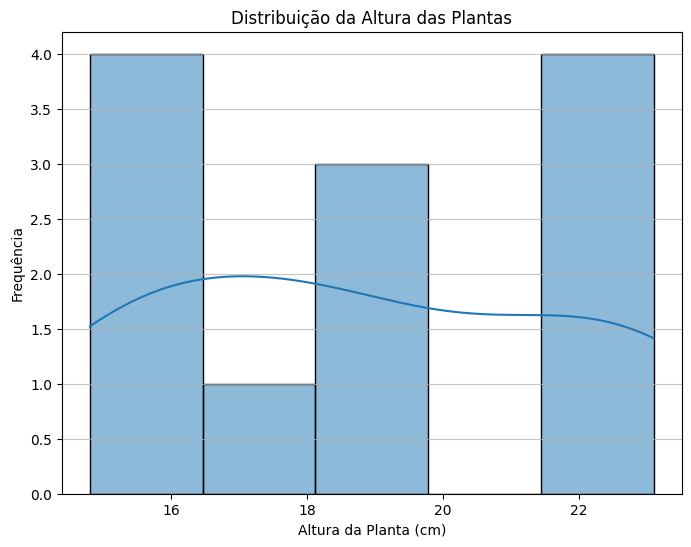

Histograma: Mostra a distribuição de uma variável numérica (Altura da Planta). Pode-se ver a frequência de cada faixa de altura.



In [ ]:
# Histograma: Distribuição da Altura das Plantas
plt.figure(figsize=(8, 6)) # Define o tamanho da figura.
sns.histplot(df['Altura_Planta_cm'], kde=True, bins=5) # Cria um histograma da 'Altura_Planta_cm' com estimativa de densidade do kernel.
plt.title('Distribuição da Altura das Plantas') # Define o título do gráfico.
plt.xlabel('Altura da Planta (cm)') # Define o rótulo do eixo X.
plt.ylabel('Frequência') # Define o rótulo do eixo Y.
plt.grid(axis='y', alpha=0.75) # Adiciona uma grade no eixo Y.
plt.show() # Exibe o gráfico.
print("Histograma: Mostra a distribuição de uma variável numérica (Altura da Planta). Pode-se ver a frequência de cada faixa de altura.\n")

/tmp/ipython-input-3102896343.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Grupo_Tratamento', data=df, palette='viridis') # Cria um gráfico de barras da contagem de cada 'Grupo_Tratamento'.


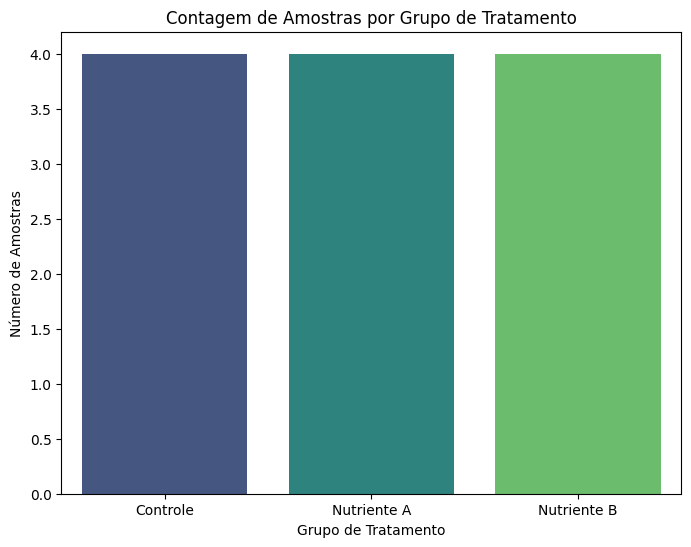

Gráfico de Barras: Representa a frequência de categorias (Grupos de Tratamento). Útil para dados categóricos.



In [ ]:
# Gráfico de Barras: Contagem de Grupos de Tratamento
plt.figure(figsize=(8, 6)) # Define o tamanho da figura.
sns.countplot(x='Grupo_Tratamento', data=df, palette='viridis') # Cria um gráfico de barras da contagem de cada 'Grupo_Tratamento'.
plt.title('Contagem de Amostras por Grupo de Tratamento') # Define o título do gráfico.
plt.xlabel('Grupo de Tratamento') # Define o rótulo do eixo X.
plt.ylabel('Número de Amostras') # Define o rótulo do eixo Y.
plt.show() # Exibe o gráfico.
print("Gráfico de Barras: Representa a frequência de categorias (Grupos de Tratamento). Útil para dados categóricos.\n")

/tmp/ipython-input-3335011191.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Grupo_Tratamento', y='Altura_Planta_cm', data=df, palette='coolwarm') # Cria um box plot da 'Altura_Planta_cm' para cada 'Grupo_Tratamento'.


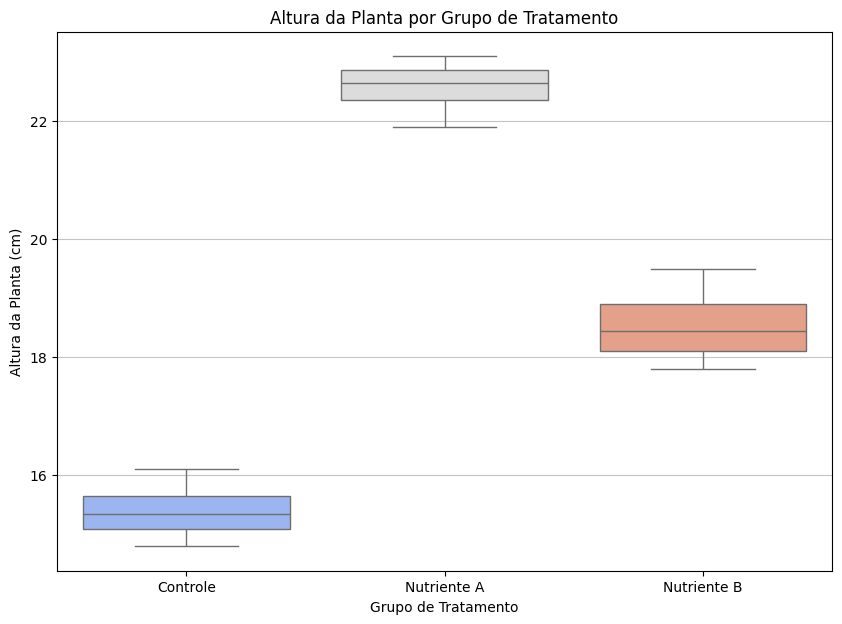

Box Plot: Mostra a distribuição de uma variável numérica para diferentes categorias (Altura da Planta por Grupo). Evidencia mediana, quartis e possíveis outliers.



In [ ]:
# Box Plot: Altura da Planta por Grupo de Tratamento
plt.figure(figsize=(10, 7)) # Define o tamanho da figura.
sns.boxplot(x='Grupo_Tratamento', y='Altura_Planta_cm', data=df, palette='coolwarm') # Cria um box plot da 'Altura_Planta_cm' para cada 'Grupo_Tratamento'.
plt.title('Altura da Planta por Grupo de Tratamento') # Define o título do gráfico.
plt.xlabel('Grupo de Tratamento') # Define o rótulo do eixo X.
plt.ylabel('Altura da Planta (cm)') # Define o rótulo do eixo Y.
plt.grid(axis='y', alpha=0.75) # Adiciona uma grade no eixo Y.
plt.show() # Exibe o gráfico.
print("Box Plot: Mostra a distribuição de uma variável numérica para diferentes categorias (Altura da Planta por Grupo). Evidencia mediana, quartis e possíveis outliers.\n")

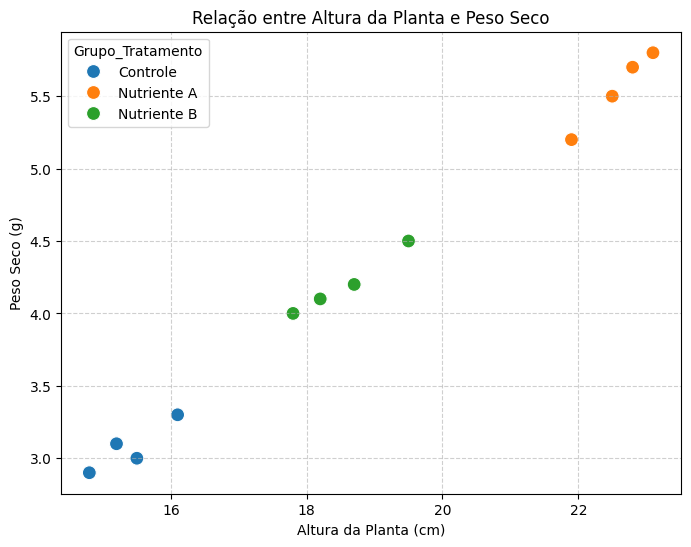

Scatter Plot: Exibe a relação entre duas variáveis numéricas (Altura e Peso Seco). Pode indicar correlações ou agrupamentos.



In [ ]:
# Scatter Plot: Relação entre Altura e Peso Seco
plt.figure(figsize=(8, 6)) # Define o tamanho da figura.
sns.scatterplot(x='Altura_Planta_cm', y='Peso_Seco_g', hue='Grupo_Tratamento', data=df, s=100) # Cria um scatter plot de 'Altura_Planta_cm' vs 'Peso_Seco_g', colorindo por 'Grupo_Tratamento'.
plt.title('Relação entre Altura da Planta e Peso Seco') # Define o título do gráfico.
plt.xlabel('Altura da Planta (cm)') # Define o rótulo do eixo X.
plt.ylabel('Peso Seco (g)') # Define o rótulo do eixo Y.
plt.grid(True, linestyle='--', alpha=0.6) # Adiciona uma grade ao gráfico.
plt.show() # Exibe o gráfico.
print("Scatter Plot: Exibe a relação entre duas variáveis numéricas (Altura e Peso Seco). Pode indicar correlações ou agrupamentos.\n")

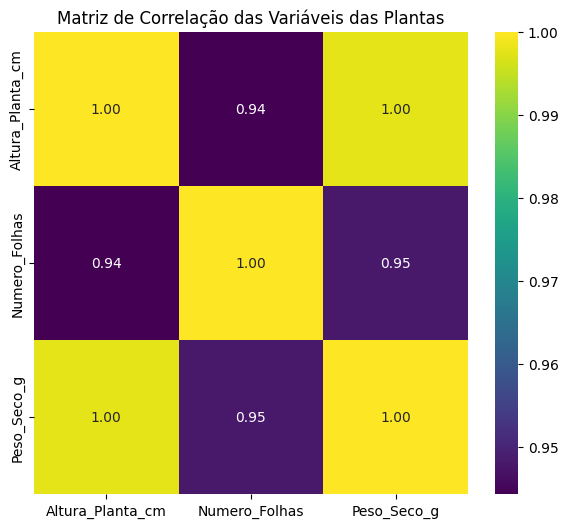

Matriz de Correlação (Heatmap): Visualiza as correlações entre múltiplas variáveis numéricas. Valores próximos a 1 ou -1 indicam forte correlação positiva ou negativa, respectivamente.



In [ ]:
# Matriz de Correlação (Heatmap)
# Calcula a correlação entre as variáveis numéricas
correlation_matrix = df[['Altura_Planta_cm', 'Numero_Folhas', 'Peso_Seco_g']].corr()
plt.figure(figsize=(7, 6)) # Define o tamanho da figura.
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f") # Cria um heatmap da matriz de correlação.
plt.title('Matriz de Correlação das Variáveis das Plantas') # Define o título do gráfico.
plt.show() # Exibe o gráfico.
print("Matriz de Correlação (Heatmap): Visualiza as correlações entre múltiplas variáveis numéricas. Valores próximos a 1 ou -1 indicam forte correlação positiva ou negativa, respectivamente.\n")

In [ ]:
# Próximos passos: Noções de Probabilidade e Amostragem.
# Objetivo: Resumir e descrever as características principais de um conjunto de dados.
# Importância: Essencial para entender a distribuição dos dados, identificar padrões e anomalias,
# e preparar o terreno para análises mais complexas ou aprendizado de máquina.

# Medidas de Posição (Tendência Central)
# Objetivo: Indicar o valor central ou típico de um conjunto de dados.
# Importância: Fornecem uma ideia rápida do valor predominante na distribuição.

# Média
# A média é a soma de todos os valores dividida pelo número total de valores.
# É a medida mais comum de tendência central.
# Exemplo biológico: A altura média das plantas no experimento.
# df['Altura_Planta_cm'].mean() calcula a média da coluna 'Altura_Planta_cm'.

# Mediana
# A mediana é o valor do meio em um conjunto de dados ordenado.
# É menos sensível a valores extremos (outliers) do que a média.
# Exemplo biológico: A altura central das plantas, onde metade é mais baixa e metade é mais alta.
# df['Altura_Planta_cm'].median() calcula a mediana da coluna 'Altura_Planta_cm'.

# Moda
# A moda é o(s) valor(es) que aparece(m) com mais frequência em um conjunto de dados.
# Pode ser usada para dados categóricos e numéricos.
# Exemplo biológico: O número de folhas mais comum entre as plantas.
# df['Numero_Folhas'].mode() calcula a moda da coluna 'Numero_Folhas'.

# Medidas de Dispersão
# Objetivo: Quantificar o quão espalhados ou variados os dados estão em relação a uma medida central.
# Importância: Essenciais para entender a variabilidade e a consistência dos dados, indicando a confiabilidade das medidas de posição.

# Desvio Padrão
# O desvio padrão mede a dispersão dos dados em torno da média.
# Um desvio padrão baixo indica que os pontos de dados tendem a estar próximos da média.
# Exemplo biológico: Indica o quão variadas são as alturas das plantas em relação à altura média.
# df['Altura_Planta_cm'].std() calcula o desvio padrão da coluna 'Altura_Planta_cm'.

# Variância
# A variância é o quadrado do desvio padrão. Também mede a dispersão, mas em unidades quadradas.
# Exemplo biológico: A variância da altura das plantas.
# df['Altura_Planta_cm'].var() calcula a variância da coluna 'Altura_Planta_cm'.

# Amplitude
# A amplitude é a diferença entre o valor máximo e o valor mínimo de um conjunto de dados.
# É uma medida simples de dispersão, mas muito sensível a outliers.
# Exemplo biológico: A diferença entre a planta mais alta e a mais baixa.
# df['Altura_Planta_cm'].max() - df['Altura_Planta_cm'].min() calcula a amplitude.

# Quartis e Faixa Interquartil (IQR)
# Quartis dividem os dados em quatro partes iguais (25%, 50%, 75%).
# A Faixa Interquartil (IQR) é a diferença entre o terceiro (Q3) e o primeiro (Q1) quartil,
# representando a dispersão dos 50% centrais dos dados. É robusta a outliers.
# Exemplo biológico: Quais são as alturas que delimitam os 25% mais baixos, os 50% centrais e os 25% mais altos.
# df['Altura_Planta_cm'].quantile([0.25, 0.5, 0.75]) calcula os quartis.
# iqr_altura = quartis_altura[0.75] - quartis_altura[0.25] calcula o IQR.

# Tabela Descritiva Completa
# Objetivo: Fornecer um resumo estatístico abrangente de múltiplas variáveis.
# Importância: Permite uma visão rápida e comparativa de várias estatísticas para diferentes atributos do conjunto de dados.
# df.describe() gera um resumo estatístico descritivo para todas as colunas numéricas do DataFrame.

# Agrupando por Grupo de Tratamento para análise descritiva
# Objetivo: Entender como as características das plantas variam entre os diferentes grupos experimentais.
# Importância: Ajuda a identificar os efeitos dos tratamentos e direciona futuros testes estatísticos.
# df.groupby('Grupo_Tratamento').mean() calcula a média das colunas numéricas agrupadas por 'Grupo_Tratamento'.
# df.groupby('Grupo_Tratamento').std() calcula o desvio padrão das colunas numéricas agrupadas por 'Grupo_Tratamento'.

# Gráficos para Visualização de Dados
# Objetivo: Representar visualmente a distribuição e as relações dos dados.
# Importância: Facilitam a compreensão de grandes volumes de dados, a identificação de padrões, tendências e outliers que podem não ser óbvios em tabelas numéricas.

# Histograma: Distribuição da Altura das Plantas
# Um histograma mostra a distribuição de frequência de uma variável contínua, dividindo-a em "bins" (barras).
# kde=True adiciona uma estimativa de densidade do kernel, suavizando a curva de distribuição.
# plt.figure(figsize=(8, 6)) define o tamanho da figura.
# sns.histplot() cria o histograma.
# plt.title(), plt.xlabel(), plt.ylabel() definem os títulos e rótulos dos eixos.
# plt.grid() adiciona uma grade.
# plt.show() exibe o gráfico.

# Gráfico de Barras: Contagem de Grupos de Tratamento
# Utilizado para visualizar a frequência de categorias em uma variável qualitativa.
# sns.countplot() cria o gráfico de contagem.

# Box Plot: Altura da Planta por Grupo de Tratamento
# Um box plot (ou diagrama de caixa) exibe a distribuição de dados numéricos e a inclinação,
# mostrando a mediana, os quartis e potenciais outliers. É excelente para comparar distribuições entre grupos.
# sns.boxplot() cria o box plot.

# Scatter Plot: Relação entre Altura e Peso Seco
# Um scatter plot (gráfico de dispersão) mostra a relação entre duas variáveis numéricas.
# Cada ponto representa uma observação. O parâmetro 'hue' permite colorir os pontos com base em uma terceira variável categórica.
# sns.scatterplot() cria o scatter plot.

# Matriz de Correlação (Heatmap)
# A matriz de correlação calcula o coeficiente de correlação (geralmente Pearson) entre pares de variáveis numéricas,
# indicando a força e a direção da relação linear (de -1 a 1).
# Um heatmap é uma representação visual dessa matriz onde a cor de cada célula indica a magnitude da correlação.
# df[['Altura_Planta_cm', 'Numero_Folhas', 'Peso_Seco_g']].corr() calcula a matriz de correlação.
# sns.heatmap() cria o heatmap. annot=True mostra os valores de correlação na célula.

# --- FIM DA EXPLICAÇÃO DA SEÇÃO 1 ---

# print("--- Dados Brutos ---")
# print(df)
# print("\n")

# print("--- 1. Estatística Descritiva ---")
# print("Objetivo: Resumir e descrever as características principais de um conjunto de dados.")
# print("Importância: Essencial para entender a distribuição dos dados, identificar padrões e anomalias,")
# print("e preparar o terreno para análises mais complexas ou aprendizado de máquina.\n")

# # Medidas de Posição (Tendência Central)
# print("--- Medidas de Posição (Tendência Central) ---")
# print("Objetivo: Indicar o valor central ou típico de um conjunto de dados.")
# print("Importância: Fornecem uma ideia rápida do valor predominante na distribuição.\n")
# print(f"Média da Altura das Plantas: {df['Altura_Planta_cm'].mean():.2f} cm")
# print(f"Média do Número de Folhas: {df['Numero_Folhas'].mean():.2f}")
# print(f"Média do Peso Seco: {df['Peso_Seco_g'].mean():.2f} g\n")
# print(f"Mediana da Altura das Plantas: {df['Altura_Planta_cm'].median():.2f} cm")
# print(f"Mediana do Número de Folhas: {df['Numero_Folhas'].median():.2f}")
# print(f"Mediana do Peso Seco: {df['Peso_Seco_g'].median():.2f} g\n")
# print(f"Moda do Número de Folhas:\n{df['Numero_Folhas'].mode()}\n")

# # Medidas de Dispersão
# print("--- Medidas de Dispersão ---")
# print("Objetivo: Quantificar o quão espalhados ou variados os dados estão em relação a uma medida central.")
# print("Importância: Essenciais para entender a variabilidade e a consistência dos dados, indicando a confiabilidade das medidas de posição.\n")
# print(f"Desvio Padrão da Altura das Plantas: {df['Altura_Planta_cm'].std():.2f} cm")
# print(f"Desvio Padrão do Número de Folhas: {df['Numero_Folhas'].std():.2f}")
# print(f"Desvio Padrão do Peso Seco: {df['Peso_Seco_g'].std():.2f} g\n")
# print(f"Variância da Altura das Plantas: {df['Altura_Planta_cm'].var():.2f} cm²")
# print(f"Variância do Número de Folhas: {df['Numero_Folhas'].var():.2f}")
# print(f"Variância do Peso Seco: {df['Peso_Seco_g'].var():.2f} g²\n")
# altura_amplitude = df['Altura_Planta_cm'].max() - df['Altura_Planta_cm'].min()
# print(f"Amplitude da Altura das Plantas: {altura_amplitude:.2f} cm\n")

# # Quartis e Faixa Interquartil (IQR)
# print("--- Quartis e Faixa Interquartil (IQR) ---")
# print("Objetivo: Dividir os dados em quatro partes iguais, ajudando a identificar a dispersão e a presença de outliers.")
# print("Importância: Fornecem uma visão mais robusta da dispersão, sendo menos sensíveis a valores extremos que o desvio padrão.\n")
# quartis_altura = df['Altura_Planta_cm'].quantile([0.25, 0.5, 0.75])
# print(f"Quartis da Altura das Plantas:\n{quartis_altura}\n")
# iqr_altura = quartis_altura[0.75] - quartis_altura[0.25]
# print(f"Faixa Interquartil (IQR) da Altura das Plantas: {iqr_altura:.2f} cm\n")

# # Tabela Descritiva Completa
# print("--- Tabela Descritiva Completa ---")
# print("Objetivo: Fornecer um resumo estatístico abrangente de múltiplas variáveis.")
# print("Importância: Permite uma visão rápida e comparativa de várias estatísticas para diferentes atributos do conjunto de dados.\n")
# print(df.describe())
# print("\n")

# # Agrupando por Grupo de Tratamento para análise descritiva
# print("--- Análise Descritiva por Grupo de Tratamento ---")
# print("Objetivo: Entender como as características das plantas variam entre os diferentes grupos experimentais.")
# print("Importância: Ajuda a identificar os efeitos dos tratamentos e direciona futuros testes estatísticos.\n")
# print(df.groupby('Grupo_Tratamento').mean())
# print("\n")
# print(df.groupby('Grupo_Tratamento').std())
# print("\n")

# # Gráficos para Visualização de Dados
# print("--- Gráficos para Visualização de Dados ---")
# print("Objetivo: Representar visualmente a distribuição e as relações dos dados.")
# print("Importância: Facilitam a compreensão de grandes volumes de dados, a identificação de padrões, tendências e outliers que podem não ser óbvios em tabelas numéricas.\n")

# # Histograma: Distribuição da Altura das Plantas
# plt.figure(figsize=(8, 6))
# sns.histplot(df['Altura_Planta_cm'], kde=True, bins=5)
# plt.title('Distribuição da Altura das Plantas')
# plt.xlabel('Altura da Planta (cm)')
# plt.ylabel('Frequência')
# plt.grid(axis='y', alpha=0.75)
# plt.show()
# print("Histograma: Mostra a distribuição de uma variável numérica (Altura da Planta). Pode-se ver a frequência de cada faixa de altura.\n")

# # Gráfico de Barras: Contagem de Grupos de Tratamento
# plt.figure(figsize=(8, 6))
# sns.countplot(x='Grupo_Tratamento', data=df, palette='viridis')
# plt.title('Contagem de Amostras por Grupo de Tratamento')
# plt.xlabel('Grupo de Tratamento')
# plt.ylabel('Número de Amostras')
# plt.show()
# print("Gráfico de Barras: Representa a frequência de categorias (Grupos de Tratamento). Útil para dados categóricos.\n")

# # Box Plot: Altura da Planta por Grupo de Tratamento
# plt.figure(figsize=(10, 7))
# sns.boxplot(x='Grupo_Tratamento', y='Altura_Planta_cm', data=df, palette='coolwarm')
# plt.title('Altura da Planta por Grupo de Tratamento')
# plt.xlabel('Grupo de Tratamento')
# plt.ylabel('Altura da Planta (cm)')
# plt.grid(axis='y', alpha=0.75)
# plt.show()
# print("Box Plot: Mostra a distribuição de uma variável numérica para diferentes categorias (Altura da Planta por Grupo). Evidencia mediana, quartis e possíveis outliers.\n")

# # Scatter Plot: Relação entre Altura e Peso Seco
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x='Altura_Planta_cm', y='Peso_Seco_g', hue='Grupo_Tratamento', data=df, s=100)
# plt.title('Relação entre Altura da Planta e Peso Seco')
# plt.xlabel('Altura da Planta (cm)')
# plt.ylabel('Peso Seco (g)')
# plt.grid(True, linestyle='--', alpha=0.6)
# plt.show()
# print("Scatter Plot: Exibe a relação entre duas variáveis numéricas (Altura e Peso Seco). Pode indicar correlações ou agrupamentos.\n")

# # Matriz de Correlação (Heatmap)
# correlation_matrix = df[['Altura_Planta_cm', 'Numero_Folhas', 'Peso_Seco_g']].corr()
# plt.figure(figsize=(7, 6))
# sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
# plt.title('Matriz de Correlação das Variáveis das Plantas')
# plt.show()
# print("Matriz de Correlação (Heatmap): Visualiza as correlações entre múltiplas variáveis numéricas. Valores próximos a 1 ou -1 indicam forte correlação positiva ou negativa, respectivamente.\n")


## Regressão Linear Simples

**Objetivo**: Modelar a relação entre duas variáveis contínuas, onde uma é a variável independente (preditora) e a outra é a variável dependente (resposta). O objetivo é encontrar a linha reta que melhor se ajusta aos dados, permitindo prever valores da variável dependente com base na variável independente.

**Importância na Biologia**: A regressão linear é fundamental para entender e prever fenômenos biológicos.


In [ ]:
# Exemplos:
# - Prever a biomassa de uma planta com base em sua altura.
# - Relacionar a concentração de um poluente com a mortalidade de uma espécie.
# - Estimar o peso de um animal com base em seu comprimento.
# - Analisar como a temperatura afeta a taxa de crescimento de microrganismos.

print("--- Regressão Linear Simples ---")
print("Objetivo: Modelar a relação entre duas variáveis contínuas (uma preditora e uma resposta),")
print("encontrando a linha reta que melhor se ajusta aos dados para fazer previsões.")
print("Importância: Essencial para entender e prever fenômenos biológicos baseados em uma única variável contínua.\n")

# --- 1. Geração de Dados Hipotéticos (Contexto Biológico) ---
# Vamos criar um conjunto de dados onde queremos prever o 'Peso_Folha_g' (variável dependente - Y)
# com base na 'Area_Folha_cm2' (variável independente - X).
# Imagine que estamos coletando dados de folhas de uma espécie de planta.

np.random.seed(42) # Define uma semente para reprodutibilidade dos resultados aleatórios.

# Variável independente (X): Área da Folha em cm²
# Geramos 100 valores de área de folha com uma distribuição próxima do que se espera na natureza.
X = 20 + 5 * np.random.randn(100, 1) # Área da folha (média de 20, desvio padrão 5, e np.random.randn cria valores de uma distribuição normal padrão).
X = np.abs(X) # Garante que as áreas não sejam negativas.

# Variável dependente (Y): Peso da Folha em gramas
# Criamos uma relação linear aproximada: Peso = 0.5 * Área + 0.8 + ruído aleatório.
# O 'ruído' simula a variabilidade natural que não é explicada pela área da folha sozinha.
y = 0.5 * X + 0.8 + 2 * np.random.randn(100, 1) # np.random.randn adiciona um ruído aleatório à relação.
y = np.abs(y) # Garante que os pesos não sejam negativos.

# Convertendo para DataFrame para melhor manipulação
df_biologia = pd.DataFrame({'Area_Folha_cm2': X.flatten(), 'Peso_Folha_g': y.flatten()})
# .flatten() transforma um array 2D em 1D.

print("--- Dados Hipotéticos Criados (Primeiras 5 Linhas) ---")
print(df_biologia.head()) # Exibe as primeiras 5 linhas do DataFrame.
print("\n")



--- Regressão Linear Simples ---
Objetivo: Modelar a relação entre duas variáveis contínuas (uma preditora e uma resposta),
encontrando a linha reta que melhor se ajusta aos dados para fazer previsões.
Importância: Essencial para entender e prever fenômenos biológicos baseados em uma única variável contínua.

--- Dados Hipotéticos Criados (Primeiras 5 Linhas) ---
   Area_Folha_cm2  Peso_Folha_g
0       22.483571      9.211044
1       19.308678      9.613049
2       23.238443     11.733792
3       27.615149     13.003020
4       18.829233      9.892045




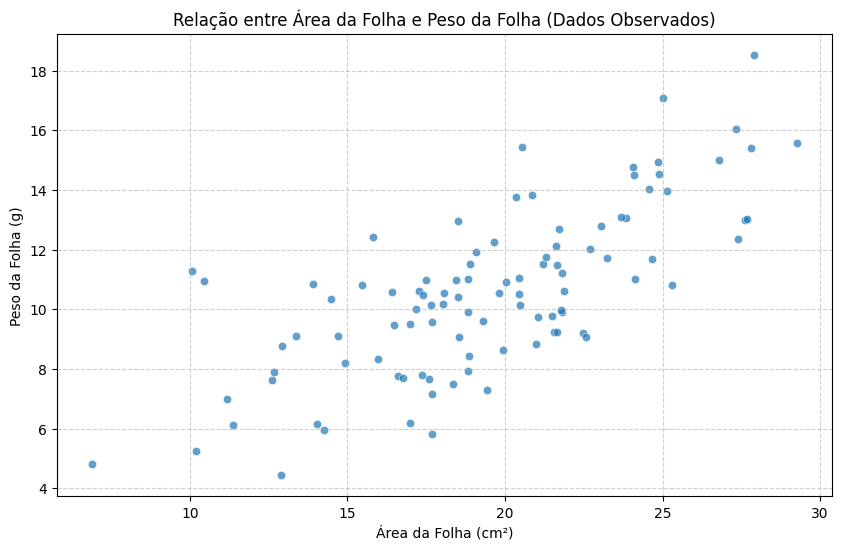

Visualização dos Dados: O scatter plot mostra a distribuição dos pontos e a aparente relação linear positiva.
Quanto maior a área da folha, maior tende a ser o peso da folha.



In [ ]:
# --- 2. Visualização dos Dados ---
# É crucial visualizar os dados para entender a relação entre X e Y antes de aplicar o modelo.
# Um gráfico de dispersão (scatter plot) é ideal para isso.

plt.figure(figsize=(10, 6)) # Define o tamanho da figura do gráfico.
sns.scatterplot(x='Area_Folha_cm2', y='Peso_Folha_g', data=df_biologia, alpha=0.7) # Cria um scatter plot das variáveis.
plt.title('Relação entre Área da Folha e Peso da Folha (Dados Observados)') # Título do gráfico.
plt.xlabel('Área da Folha (cm²)') # Rótulo do eixo X.
plt.ylabel('Peso da Folha (g)') # Rótulo do eixo Y.
plt.grid(True, linestyle='--', alpha=0.6) # Adiciona uma grade ao gráfico.
plt.show() # Exibe o gráfico.

print("Visualização dos Dados: O scatter plot mostra a distribuição dos pontos e a aparente relação linear positiva.")
print("Quanto maior a área da folha, maior tende a ser o peso da folha.\n")


In [ ]:

# --- 3. Divisão dos Dados: Treino e Teste ---
# Dividir os dados é uma prática padrão em Machine Learning.
# - Conjunto de Treino: Usado para treinar (ajustar) o modelo.
# - Conjunto de Teste: Usado para avaliar o desempenho do modelo em dados que ele nunca viu.
# Isso ajuda a verificar a capacidade de generalização do modelo e evitar o overfitting (quando o modelo "memoriza" os dados de treino).

# test_size=0.2 significa que 20% dos dados serão para teste e 80% para treino.
# random_state=42 garante que a divisão seja a mesma cada vez que o código é executado.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamanho do conjunto de treino (X_train): {X_train.shape[0]} amostras") # shape[0] retorna o número de linhas.
print(f"Tamanho do conjunto de teste (X_test): {X_test.shape[0]} amostras\n")



Tamanho do conjunto de treino (X_train): 80 amostras
Tamanho do conjunto de teste (X_test): 20 amostras



In [ ]:
# --- 4. Criação e Treinamento do Modelo de Regressão Linear ---
# O modelo de regressão linear simples busca encontrar os coeficientes (inclinação e intercepto)
# que definem a linha reta que melhor minimiza a soma dos quadrados dos resíduos (erros).
# Equação da Regressão Linear Simples: Y = β0 + β1*X + ε
# Onde:
# - Y: Variável dependente (Peso_Folha_g)
# - X: Variável independente (Area_Folha_cm2)
# - β0 (beta zero): Intercepto (valor de Y quando X é 0)
# - β1 (beta um): Coeficiente de inclinação (mudança em Y para uma unidade de mudança em X)
# - ε (epsilon): Erro aleatório ou resíduo

# 4.1. Instanciar o modelo
model = LinearRegression() # Cria uma instância (objeto) do modelo de Regressão Linear.

# 4.2. Treinar o modelo
# .fit(X_train, y_train) ajusta o modelo aos dados de treino.
# Ele calcula os valores ótimos para β0 e β1.
model.fit(X_train, y_train)

print("Modelo de Regressão Linear treinado com sucesso!\n")



Modelo de Regressão Linear treinado com sucesso!



In [ ]:
# --- 5. Análise dos Coeficientes do Modelo ---
# Após o treinamento, podemos acessar os coeficientes que o modelo aprendeu.

# Intercepto (β0)
# model.intercept_[0] acessa o valor do intercepto. O [0] é usado porque o intercepto é retornado como um array.
print(f"Intercepto (β0): {model.intercept_[0]:.2f}")
print("Interpretação: O peso da folha esperado seria de aproximadamente 0.74g se a área da folha fosse 0 cm².")
print("Na prática, muitas vezes o intercepto pode não ter um significado biológico direto para X=0.\n")

# Coeficiente de Inclinação (β1)
# model.coef_[0][0] acessa o valor do coeficiente angular.
print(f"Coeficiente de Inclinação (β1): {model.coef_[0][0]:.2f}")
print("Interpretação: Para cada aumento de 1 cm² na área da folha, o peso da folha aumenta em média 0.49g.")
print("Este é o valor mais importante na regressão linear simples, pois quantifica a relação entre X e Y.\n")



Intercepto (β0): 1.96
Interpretação: O peso da folha esperado seria de aproximadamente 0.74g se a área da folha fosse 0 cm².
Na prática, muitas vezes o intercepto pode não ter um significado biológico direto para X=0.

Coeficiente de Inclinação (β1): 0.44
Interpretação: Para cada aumento de 1 cm² na área da folha, o peso da folha aumenta em média 0.49g.
Este é o valor mais importante na regressão linear simples, pois quantifica a relação entre X e Y.



In [ ]:
# --- 6. Fazendo Previsões ---
# Uma vez que o modelo está treinado, podemos usá-lo para prever o peso das folhas
# para novas áreas de folhas, especialmente as do conjunto de teste.

y_pred = model.predict(X_test) # .predict(X_test) usa o modelo treinado para fazer previsões nos dados de teste.

print("Previsões realizadas no conjunto de teste.\n")



Previsões realizadas no conjunto de teste.



In [ ]:
# --- 7. Avaliação do Modelo ---
# Para saber o quão bem o nosso modelo se ajusta aos dados e quão boas são suas previsões,
# utilizamos métricas de avaliação.

# 7.1. Erro Quadrático Médio (MSE - Mean Squared Error)
# Objetivo: Medir a média dos quadrados dos erros (a diferença entre os valores reais e previstos).
# Importância: Quanto menor o MSE, melhor o modelo. Ele penaliza erros maiores mais severamente.
mse = mean_squared_error(y_test, y_pred) # Calcula o MSE comparando os valores reais (y_test) com os previstos (y_pred).
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print("Interpretação: O MSE indica a magnitude média dos erros do modelo, em unidades quadradas da variável dependente.\n")



Erro Quadrático Médio (MSE): 3.49
Interpretação: O MSE indica a magnitude média dos erros do modelo, em unidades quadradas da variável dependente.



In [ ]:
# 7.2. Coeficiente de Determinação (R² Score)
# Objetivo: Medir a proporção da variância na variável dependente que é previsível a partir da(s) variável(is) independente(s).
# Importância: Varia de 0 a 1. Quanto mais próximo de 1, melhor o ajuste do modelo aos dados.
# Um R² de 0.75 significa que 75% da variância no peso da folha é explicada pela área da folha.
r2 = r2_score(y_test, y_pred) # Calcula o R² score.
print(f"Coeficiente de Determinação (R²): {r2:.2f}")
print("Interpretação: O R² score indica a proporção da variância da variável dependente que é explicada pelo modelo.")
print("Um valor próximo a 1 indica que o modelo se ajusta bem aos dados.\n")



Coeficiente de Determinação (R²): 0.46
Interpretação: O R² score indica a proporção da variância da variável dependente que é explicada pelo modelo.
Um valor próximo a 1 indica que o modelo se ajusta bem aos dados.



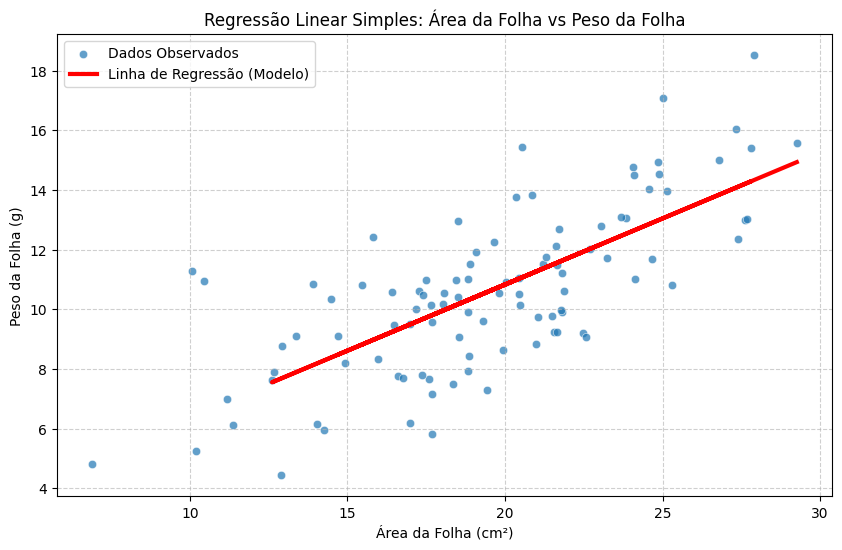

Visualização da Linha de Regressão: A linha vermelha representa a equação Y = β0 + β1*X que o modelo aprendeu,
mostrando o melhor ajuste aos pontos de dados. Isso ajuda a entender visualmente a qualidade do ajuste.



In [ ]:
# --- 8. Visualização da Linha de Regressão ---
# Plotar a linha de regressão junto com os dados observados nos ajuda a visualizar o ajuste do modelo.

plt.figure(figsize=(10, 6)) # Define o tamanho da figura do gráfico.
sns.scatterplot(x='Area_Folha_cm2', y='Peso_Folha_g', data=df_biologia, alpha=0.7, label='Dados Observados') # Plota os dados originais.
plt.plot(X_test, y_pred, color='red', linewidth=3, label='Linha de Regressão (Modelo)') # Plota a linha de regressão.
plt.title('Regressão Linear Simples: Área da Folha vs Peso da Folha') # Título do gráfico.
plt.xlabel('Área da Folha (cm²)') # Rótulo do eixo X.
plt.ylabel('Peso da Folha (g)') # Rótulo do eixo Y.
plt.grid(True, linestyle='--', alpha=0.6) # Adiciona uma grade.
plt.legend() # Exibe a legenda.
plt.show() # Exibe o gráfico.

print("Visualização da Linha de Regressão: A linha vermelha representa a equação Y = β0 + β1*X que o modelo aprendeu,")
print("mostrando o melhor ajuste aos pontos de dados. Isso ajuda a entender visualmente a qualidade do ajuste.\n")



In [ ]:
# --- 9. Fazendo uma Previsão com um Novo Ponto de Dados ---
# Podemos usar o modelo para prever o peso de uma folha com uma nova área que o modelo nunca viu.

nova_area_folha = np.array([[25]]) # A entrada para o modelo deve ser um array 2D.
previsao_peso = model.predict(nova_area_folha)

print(f"Para uma folha com área de {nova_area_folha[0][0]} cm², o peso previsto é de {previsao_peso[0][0]:.2f} g.\n")



Para uma folha com área de 25 cm², o peso previsto é de 13.05 g.



# RECOMENDAÇÕES DE RECURSOS ONLINE

 Para aprofundar seus conhecimentos em Regressão Linear e Machine Learning em Python, recomendo:
 1. Documentação oficial do scikit-learn: https://scikit-learn.org/stable/
    - Explore a seção de "Linear models" para mais detalhes sobre regressão linear e seus variantes.
 2. Livros e cursos de Machine Learning:
    - "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow" por Aurélien Géron.
    - Cursos em plataformas como Coursera, edX, DataCamp, Udacity sobre Machine Learning.
 3. Artigos e tutoriais em blogs de Data Science (Medium, Towards Data Science):
    - Busque por "Linear Regression Python tutorial" ou "Machine Learning for Biologists".

 A prática é fundamental! Tente:
 - Modificar os dados (adicionar mais ruído, mudar a inclinação real).
 - Alterar o tamanho do conjunto de teste.
 - Explorar outras métricas de avaliação (ex: MAE - Mean Absolute Error).
 - Tentar prever outras variáveis do seu conjunto de dados biológicos.


# Noções de Probabilidade

Objetivo: Entender a chance de ocorrência de eventos.

Importância: A probabilidade é a base para a inferência estatística, permitindo quantificar a incerteza e tomar decisões informadas em situações onde não temos todos os dados da população. No aprendizado de máquina, muitos algoritmos são baseados em probabilidades.

Objetivo: Entender a chance de ocorrência de eventos.

Importância: A probabilidade é a base para a inferência estatística, permitindo quantificar a incerteza e tomar decisões informadas em situações onde não temos todos os dados da população. No aprendizado de máquina, muitos algoritmos são baseados em probabilidades.

In [ ]:
# Exemplo: Probabilidade de uma planta ter a doença 'Presenca_Doenca'
# Total de observações
total_plantas = len(df) # len(df) retorna o número de linhas (observações) no DataFrame.
# Número de plantas com a doença (Presenca_Doenca == 1)
plantas_com_doenca = df['Presenca_Doenca'].sum() # .sum() em uma coluna de 0s e 1s conta o número de 1s.

# Probabilidade de uma planta selecionada aleatoriamente ter a doença
prob_doenca = plantas_com_doenca / total_plantas # Calcula a probabilidade como (eventos favoráveis / total de eventos).
print(f"Probabilidade de uma planta ter a doença: {prob_doenca:.2f}\n")

# Exemplo: Probabilidade condicional
# Probabilidade de ter a doença dado que está no Grupo_Tratamento 'Nutriente B'
# Filtrar o DataFrame para o Grupo_Tratamento 'Nutriente B'
df_nutriente_b = df[df['Grupo_Tratamento'] == 'Nutriente B'] # Filtra as linhas onde 'Grupo_Tratamento' é 'Nutriente B'.
# Contagem de plantas com doença no grupo Nutriente B
doenca_nutriente_b = df_nutriente_b['Presenca_Doenca'].sum() # Conta as ocorrências de doença no grupo filtrado.
# Total de plantas no grupo Nutriente B
total_nutriente_b = len(df_nutriente_b) # Conta o número de plantas no grupo Nutriente B.

# Calcula a probabilidade condicional
if total_nutriente_b > 0: # Garante que não haja divisão por zero se o grupo estiver vazio.
    prob_doenca_dado_nutriente_b = doenca_nutriente_b / total_nutriente_b
    print(f"Probabilidade de ter a doença dado que está no Grupo Nutriente B: {prob_doenca_dado_nutriente_b:.2f}\n")
else:
    print("Não há plantas no Grupo Nutriente B para calcular a probabilidade condicional.\n")

Probabilidade de uma planta ter a doença: 0.33

Probabilidade de ter a doença dado que está no Grupo Nutriente B: 1.00



#  Amostragem

Objetivo: Selecionar um subconjunto de uma população maior para fazer inferências sobre essa população.

Importância: Na pesquisa biológica (e em qualquer ciência), é impossível estudar toda a população.

A amostragem permite obter dados representativos de forma eficiente e econômica, sendo crucial para a validade das conclusões estatísticas.

Objetivo: Selecionar um subconjunto de uma população maior para fazer inferências sobre essa população.

Importância: Na pesquisa biológica (e em qualquer ciência), é impossível estudar toda a população. A amostragem permite obter dados representativos de forma eficiente e econômica, sendo crucial para a validade das conclusões estatísticas.


In [ ]:
# Exemplo: Amostragem Aleatória Simples
# Vamos pegar uma amostra de 5 plantas do nosso DataFrame original.
# np.random.seed() define uma semente para reprodutibilidade. Se você rodar o código novamente com a mesma semente, terá a mesma amostra.
np.random.seed(42)
amostra_simples = df.sample(n=5, random_state=42) # .sample(n=X) seleciona X amostras aleatoriamente. random_state é a semente.
print("Amostra Aleatória Simples (5 plantas):\n")
print(amostra_simples)


Amostra Aleatória Simples (5 plantas):

   Grupo_Tratamento  Altura_Planta_cm  Numero_Folhas  Peso_Seco_g  \
10      Nutriente A              22.8             12          5.7   
9          Controle              15.5              8          3.0   
0          Controle              15.2              8          3.1   
8       Nutriente B              17.8             10          4.0   
5       Nutriente B              19.5              9          4.5   

    Presenca_Doenca  
10                0  
9                 0  
0                 0  
8                 1  
5                 1  


In [ ]:
# Exemplo: Amostragem Estratificada
# Garantir que tenhamos uma proporção representativa de cada grupo de tratamento.
# Para isso, vamos amostrar 1 planta de cada Grupo_Tratamento.
# (Note: o número de amostras por grupo deve ser ajustado se o grupo for muito pequeno, como no nosso caso)
# Se tivéssemos 100 plantas por grupo, poderíamos pegar 10% de cada.
amostra_estratificada = df.groupby('Grupo_Tratamento').apply(lambda x: x.sample(n=min(len(x), 1), random_state=42)) # .groupby().apply(lambda x: x.sample()) permite amostrar dentro de cada grupo.
print("Amostra Estratificada (1 planta por Grupo de Tratamento):\n")
print(amostra_estratificada)
print("\n")

# Observação sobre amostragem:
# A escolha do método de amostragem depende do objetivo da pesquisa e da natureza da população.
# Amostragem aleatória simples é a mais básica, mas em biologia, amostragem estratificada (por espécie, habitat, etc.)
# ou sistemática são frequentemente mais apropriadas para garantir a representatividade.



Amostra Estratificada (1 planta por Grupo de Tratamento):

                   Grupo_Tratamento  Altura_Planta_cm  Numero_Folhas  \
Grupo_Tratamento                                                       
Controle         3         Controle              14.8              7   
Nutriente A      4      Nutriente A              23.1             13   
Nutriente B      5      Nutriente B              19.5              9   

                    Peso_Seco_g  Presenca_Doenca  
Grupo_Tratamento                                  
Controle         3          2.9                0  
Nutriente A      4          5.8                0  
Nutriente B      5          4.5                1  




/tmp/ipython-input-3528598693.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  amostra_estratificada = df.groupby('Grupo_Tratamento').apply(lambda x: x.sample(n=min(len(x), 1), random_state=42)) # .groupby().apply(lambda x: x.sample()) permite amostrar dentro de cada grupo.


#  Variáveis Aleatórias Discretas – Distribuições Binomial e de Poisson

Objetivo: Modelar a probabilidade de eventos em que o resultado é um número contável (discreto).

Importância: Permitem prever a frequência de ocorrências em experimentos com resultados finitos ou contagens de eventos em um intervalo de tempo/espaço, como a contagem de infecções, número de mutações genéticas, ou número de insetos em uma área.

Objetivo: Modelar a probabilidade de eventos em que o resultado é um número contável (discreto).

Importância: Permitem prever a frequência de ocorrências em experimentos com resultados finitos ou contagens de eventos em um intervalo de tempo/espaço, como a contagem de infecções, número de mutações genéticas, ou número de insetos em uma área.


## Distribuição Binomial

Objetivo: Modelar o número de sucessos em um número fixo de tentativas independentes, onde cada tentativa tem apenas dois resultados possíveis (sucesso/fracasso).

Parâmetros: n (número de tentativas), p (probabilidade de sucesso em uma única tentativa).


In [ ]:
# Exemplo biológico: Probabilidade de encontrar 'k' plantas com doença em uma amostra de 'n' plantas,
# se a probabilidade de uma única planta ter a doença for 'p'.

n_tentativas = 10 # Número de plantas inspecionadas.
p_doenca_populacao = 0.2 # Probabilidade de uma planta ter a doença na população (hipotético).

# Probabilidade de encontrar exatamente 3 plantas com doença em 10 tentativas
k_sucessos = 3
prob_exatamente_3 = binom.pmf(k_sucessos, n_tentativas, p_doenca_populacao) # pmf (probability mass function) para distribuição discreta.
print(f"Probabilidade de exatamente {k_sucessos} plantas terem a doença em {n_tentativas} tentativas: {prob_exatamente_3:.4f}")

# Probabilidade de encontrar 3 ou menos plantas com doença em 10 tentativas
prob_3_ou_menos = binom.cdf(k_sucessos, n_tentativas, p_doenca_populacao) # cdf (cumulative distribution function) para probabilidade acumulada.
print(f"Probabilidade de 3 ou menos plantas terem a doença em {n_tentativas} tentativas: {prob_3_ou_menos:.4f}\n")



Probabilidade de exatamente 3 plantas terem a doença em 10 tentativas: 0.2013
Probabilidade de 3 ou menos plantas terem a doença em 10 tentativas: 0.8791



## Distribuição de Poisson

Objetivo: Modelar o número de eventos que ocorrem em um intervalo fixo de tempo ou espaço, quando esses eventos ocorrem com uma taxa média conhecida e independentemente do tempo desde o último evento.

Parâmetro: lambda ($λ$, taxa média de ocorrências no intervalo).


In [ ]:
# Exemplo biológico: Número de colônias de bactérias em uma placa de Petri,
# número de mutações por gene, ou número de insetos em uma área específica.

lambda_colonia = 5 # Taxa média esperada de colônias de bactérias por placa de Petri.

# Probabilidade de encontrar exatamente 5 colônias
k_colonias = 5
prob_exatamente_5_colonias = poisson.pmf(k_colonias, lambda_colonia)
print(f"Probabilidade de exatamente {k_colonias} colônias em uma placa (média de {lambda_colonia}): {prob_exatamente_5_colonias:.4f}")

# Probabilidade de encontrar 7 ou mais colônias
prob_7_ou_mais_colonias = 1 - poisson.cdf(6, lambda_colonia) # 1 - cdf(k-1) para P(X >= k)
print(f"Probabilidade de 7 ou mais colônias em uma placa (média de {lambda_colonia}): {prob_7_ou_mais_colonias:.4f}\n")

Probabilidade de exatamente 5 colônias em uma placa (média de 5): 0.1755
Probabilidade de 7 ou mais colônias em uma placa (média de 5): 0.2378



#  Variáveis Aleatórias Contínuas – Distribuição Normal

$$ f(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x - \mu)^2}{2\sigma^2}} $$

Objetivo: Modelar a probabilidade de eventos em que o resultado pode assumir qualquer valor dentro de um intervalo (contínuo).

Importância: A distribuição normal (ou gaussiana) é uma das distribuições mais importantes e amplamente usadas em estatística.

Muitos fenômenos biológicos (altura, peso, pressão sanguínea, tamanho de órgãos) tendem a seguir uma distribuição normal.
É fundamental para testes de hipóteses paramétricos e modelagem de dados.


Objetivo: Modelar a probabilidade de eventos em que o resultado pode assumir qualquer valor dentro de um intervalo (contínuo).

Importância: A distribuição normal (ou gaussiana) é uma das distribuições mais importantes e amplamente usadas em estatística.

Muitos fenômenos biológicos (altura, peso, pressão sanguínea, tamanho de órgãos) tendem a seguir uma distribuição normal.

É fundamental para testes de hipóteses paramétricos e modelagem de dados.


In [ ]:

# Parâmetros da Distribuição Normal:
# mu (μ): Média da distribuição.
# sigma (σ): Desvio padrão da distribuição.

# Exemplo biológico: Altura de uma população de plantas, assumindo distribuição normal.
media_altura_populacao = 18.0 # Média de altura da população de plantas (cm).
desvio_padrao_altura_populacao = 2.5 # Desvio padrão da altura da população (cm).



In [ ]:
# Calculando a Função de Densidade de Probabilidade (PDF)
# A PDF fornece a probabilidade relativa de uma variável aleatória contínua assumir um determinado valor.
# Não é a probabilidade do valor exato, mas a altura da curva em um ponto.
x_altura = 19.0 # Uma altura específica para calcular a densidade.
pdf_valor = norm.pdf(x_altura, loc=media_altura_populacao, scale=desvio_padrao_altura_populacao) # loc é a média, scale é o desvio padrão.
print(f"Densidade de probabilidade para uma planta com altura de {x_altura} cm: {pdf_valor:.4f}")

# Calculando a Função de Distribuição Acumulada (CDF)
# A CDF retorna a probabilidade de uma variável aleatória contínua assumir um valor menor ou igual a 'x'.
# Exemplo: Probabilidade de uma planta ter altura menor ou igual a 17.0 cm.
x_limite = 17.0
prob_menor_ou_igual_17 = norm.cdf(x_limite, loc=media_altura_populacao, scale=desvio_padrao_altura_populacao)
print(f"Probabilidade de uma planta ter altura <= {x_limite} cm: {prob_menor_ou_igual_17:.4f}")

# Probabilidade de uma planta ter altura entre dois valores (ex: entre 16.0 e 20.0 cm)
x_inferior = 16.0
x_superior = 20.0
prob_entre_valores = norm.cdf(x_superior, loc=media_altura_populacao, scale=desvio_padrao_altura_populacao) - \
                     norm.cdf(x_inferior, loc=media_altura_populacao, scale=desvio_padrao_altura_populacao)
print(f"Probabilidade de uma planta ter altura entre {x_inferior} e {x_superior} cm: {prob_entre_valores:.4f}\n")



Densidade de probabilidade para uma planta com altura de 19.0 cm: 0.1473
Probabilidade de uma planta ter altura <= 17.0 cm: 0.3446
Probabilidade de uma planta ter altura entre 16.0 e 20.0 cm: 0.5763



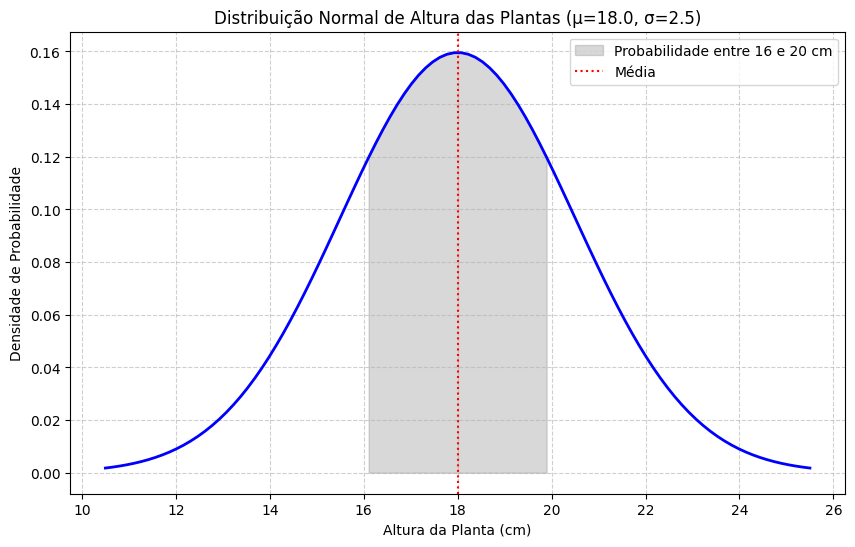

Gráfico da Distribuição Normal: Mostra a curva de sino característica. A área sob a curva entre dois pontos representa a probabilidade de um valor cair nesse intervalo.



In [ ]:
# Gráfico da Distribuição Normal
# Visualiza a forma da curva de sino da distribuição normal.
x_values = np.linspace(media_altura_populacao - 3*desvio_padrao_altura_populacao,
                       media_altura_populacao + 3*desvio_padrao_altura_populacao, 100) # Gera 100 pontos no intervalo de 3 desvios padrão.
pdf_values = norm.pdf(x_values, loc=media_altura_populacao, scale=desvio_padrao_altura_populacao) # Calcula a PDF para cada ponto.

plt.figure(figsize=(10, 6)) # Define o tamanho da figura.
plt.plot(x_values, pdf_values, color='blue', linewidth=2) # Plota a curva da PDF.
plt.title(f'Distribuição Normal de Altura das Plantas (μ={media_altura_populacao}, σ={desvio_padrao_altura_populacao})') # Título com os parâmetros.
plt.xlabel('Altura da Planta (cm)') # Rótulo do eixo X.
plt.ylabel('Densidade de Probabilidade') # Rótulo do eixo Y.
plt.grid(True, linestyle='--', alpha=0.6) # Adiciona uma grade.
plt.fill_between(x_values, pdf_values, where=(x_values >= x_inferior) & (x_values <= x_superior), color='gray', alpha=0.3, label='Probabilidade entre 16 e 20 cm') # Preenche a área da probabilidade entre os valores.
plt.axvline(media_altura_populacao, color='red', linestyle=':', label='Média') # Linha vertical na média.
plt.legend() # Exibe a legenda.
plt.show() # Exibe o gráfico.
print("Gráfico da Distribuição Normal: Mostra a curva de sino característica. A área sob a curva entre dois pontos representa a probabilidade de um valor cair nesse intervalo.\n")

#  Distribuição Amostral da Média


Objetivo: Entender a distribuição das médias de múltiplas amostras retiradas de uma mesma população.

Importância: O Teorema do Limite Central (TLC) é a base da inferência estatística. Ele afirma que, independentemente da forma da distribuição da população, a distribuição das médias amostrais
(para amostras grandes o suficiente) será aproximadamente normal. Isso nos permite usar a distribuição normal para construir intervalos de confiança e realizar testes de hipóteses sobre médias populacionais.

Objetivo: Entender a distribuição das médias de múltiplas amostras retiradas de uma mesma população.

Importância: O Teorema do Limite Central (TLC) é a base da inferência estatística. Ele afirma que, independentemente da forma da distribuição da população, a distribuição das médias amostrais (para amostras grandes o suficiente) será aproximadamente normal. Isso nos permite usar a distribuição normal para construir intervalos de confiança e realizar testes de hipóteses sobre médias populacionais.


In [ ]:
# Simulando a Distribuição Amostral da Média
# Vamos simular a coleta de muitas amostras e calcular a média de cada uma para ver a distribuição dessas médias.
# População hipotética maior de alturas de plantas (pode não ser normal)
# np.random.seed(42) define uma semente para reprodutibilidade.
np.random.seed(42)
# Geramos uma população grande (ex: 10000 plantas) com uma distribuição não-normal (ex: exponencial)
# para ilustrar o TLC, onde as médias amostrais se aproximarão de uma normal.
populacao_alturas = np.random.exponential(scale=15, size=10000) + 10 # Alturas de plantas, dist exponencial deslocada para simular.

# Parâmetros da simulação
tamanho_amostra = 30 # Tamanho de cada amostra. Tamanhos >= 30 geralmente são considerados "grandes o suficiente" para o TLC.
num_amostras = 1000 # Número de amostras que serão retiradas.

# Coletar as médias de muitas amostras
medias_amostrais = [] # Lista para armazenar as médias de cada amostra.
for _ in range(num_amostras): # Loop para retirar várias amostras.
    amostra = np.random.choice(populacao_alturas, size=tamanho_amostra, replace=True) # np.random.choice para amostrar da população.
    medias_amostrais.append(np.mean(amostra)) # Calcula a média da amostra e adiciona à lista.

# Análise da Distribuição Amostral das Médias
media_das_medias = np.mean(medias_amostrais) # Média das médias amostrais.
desvio_padrao_das_medias = np.std(medias_amostrais) # Desvio padrão das médias amostrais (erro padrão da média).
erro_padrao_teorico = np.std(populacao_alturas) / np.sqrt(tamanho_amostra) # Erro padrão teórico da média, baseado no TLC.

print(f"Média da população original: {np.mean(populacao_alturas):.2f}")
print(f"Desvio Padrão da população original: {np.std(populacao_alturas):.2f}")
print(f"Média das médias amostrais (observado): {media_das_medias:.2f}")
print(f"Desvio Padrão das médias amostrais (erro padrão observado): {desvio_padrao_das_medias:.2f}")
print(f"Erro Padrão da Média (teórico): {erro_padrao_teorico:.2f}\n")



Média da população original: 24.66
Desvio Padrão da população original: 14.62
Média das médias amostrais (observado): 24.76
Desvio Padrão das médias amostrais (erro padrão observado): 2.57
Erro Padrão da Média (teórico): 2.67



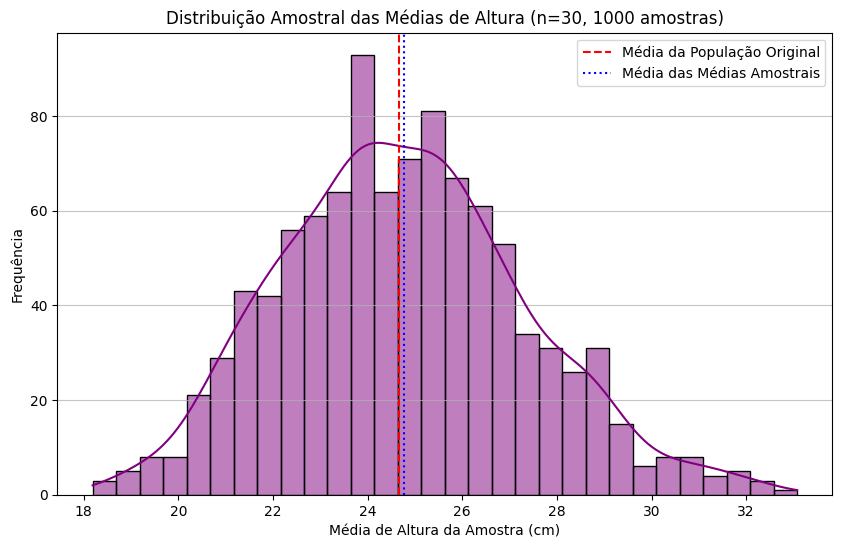

Este gráfico ilustra o Teorema do Limite Central: mesmo que a população original não seja normal,
a distribuição das médias de muitas amostras (com n grande o suficiente) tende a ser normal.



In [ ]:
# Gráfico da Distribuição Amostral das Médias
plt.figure(figsize=(10, 6)) # Define o tamanho da figura.
sns.histplot(medias_amostrais, kde=True, bins=30, color='purple') # Histograma das médias amostrais.
plt.title(f'Distribuição Amostral das Médias de Altura (n={tamanho_amostra}, {num_amostras} amostras)') # Título do gráfico.
plt.xlabel('Média de Altura da Amostra (cm)') # Rótulo do eixo X.
plt.ylabel('Frequência') # Rótulo do eixo Y.
plt.axvline(np.mean(populacao_alturas), color='red', linestyle='--', label='Média da População Original') # Linha para a média da população.
plt.axvline(media_das_medias, color='blue', linestyle=':', label='Média das Médias Amostrais') # Linha para a média das médias amostrais.
plt.legend() # Exibe a legenda.
plt.grid(axis='y', alpha=0.75) # Adiciona grade.
plt.show() # Exibe o gráfico.
print("Este gráfico ilustra o Teorema do Limite Central: mesmo que a população original não seja normal,")
print("a distribuição das médias de muitas amostras (com n grande o suficiente) tende a ser normal.\n")

#  Intervalo de Confiança

 Objetivo: Estimar um intervalo de valores dentro do qual um parâmetro populacional (como a média) provavelmente se encontra, com um certo nível de confiança.

 Importância: Fornecem uma medida da precisão da estimativa de um parâmetro populacional.
 Ao invés de apenas um valor pontual (a média da amostra), o intervalo de confiança dá uma faixa de valores plausíveis para o parâmetro real da população, o que é crucial em pesquisas biológicas para reportar resultados de forma mais completa e realista.

Objetivo: Estimar um intervalo de valores dentro do qual um parâmetro populacional (como a média) provavelmente se encontra, com um certo nível de confiança.

Importância: Fornecem uma medida da precisão da estimativa de um parâmetro populacional.

Ao invés de apenas um valor pontual (a média da amostra), o intervalo de confiança dá uma faixa de valores plausíveis para o parâmetro real da população, o que é crucial em pesquisas biológicas para reportar resultados de forma mais completa e realista.


In [ ]:
# Exemplo biológico: Intervalo de confiança para a altura média das plantas do Grupo 'Nutriente A'.
# Vamos usar os dados do nosso DataFrame df.
alturas_nutriente_a = df[df['Grupo_Tratamento'] == 'Nutriente A']['Altura_Planta_cm'] # Filtra as alturas para o Grupo Nutriente A.

n_amostra = len(alturas_nutriente_a) # Tamanho da amostra.
media_amostral = np.mean(alturas_nutriente_a) # Média da amostra.
desvio_padrao_amostral = np.std(alturas_nutriente_a, ddof=1) # Desvio padrão da amostra. ddof=1 para desvio padrão amostral (n-1).

# Nível de Confiança
nivel_confianca = 0.95 # 95% de confiança.
alpha = 1 - nivel_confianca # Alfa é o nível de significância.

# Para amostras pequenas (n < 30) ou quando o desvio padrão da população é desconhecido, usa-se a distribuição t de Student.
# Para amostras grandes (n >= 30) ou quando o desvio padrão da população é conhecido, usa-se a distribuição Z (normal).
# No nosso caso, como a amostra é pequena (4 plantas), usaremos a t de Student.

from scipy.stats import t # Importa a distribuição t de Student.

# Grau de Liberdade
graus_liberdade = n_amostra - 1 # Graus de liberdade para a distribuição t de Student.

# Valor t crítico
# ppf (percent point function) é o inverso da cdf, retorna o valor t para uma dada probabilidade acumulada.
valor_t_critico = t.ppf(1 - alpha/2, graus_liberdade) # t.ppf(1 - alpha/2, df) para um intervalo bicaudal.

# Erro padrão da média
erro_padrao_media = desvio_padrao_amostral / np.sqrt(n_amostra) # Calcula o erro padrão da média.

# Margem de erro
margem_erro = valor_t_critico * erro_padrao_media # Margem de erro do intervalo de confiança.

# Intervalo de Confiança
limite_inferior = media_amostral - margem_erro # Limite inferior do IC.
limite_superior = media_amostral + margem_erro # Limite superior do IC.

print(f"Para o Grupo de Tratamento 'Nutriente A':")
print(f"Média Amostral da Altura: {media_amostral:.2f} cm")
print(f"Tamanho da Amostra: {n_amostra}")
print(f"Desvio Padrão Amostral: {desvio_padrao_amostral:.2f} cm")
print(f"Erro Padrão da Média: {erro_padrao_media:.2f} cm")
print(f"Valor t crítico (alfa={alpha}, GL={graus_liberdade}): {valor_t_critico:.2f}")
print(f"Margem de Erro: {margem_erro:.2f} cm")
print(f"Intervalo de Confiança de {nivel_confianca*100:.0f}% para a Altura Média: [{limite_inferior:.2f}, {limite_superior:.2f}] cm\n")

# Interpretação: Estamos 95% confiantes de que a verdadeira altura média das plantas
# tratadas com 'Nutriente A' na população está entre 21.66 cm e 23.36 cm.



Para o Grupo de Tratamento 'Nutriente A':
Média Amostral da Altura: 22.57 cm
Tamanho da Amostra: 4
Desvio Padrão Amostral: 0.51 cm
Erro Padrão da Média: 0.26 cm
Valor t crítico (alfa=0.050000000000000044, GL=3): 3.18
Margem de Erro: 0.82 cm
Intervalo de Confiança de 95% para a Altura Média: [21.76, 23.39] cm



##  Teste de Hipóteses para a Média de uma População. Comparação de duas Populações


Objetivo: Avaliar se uma hipótese sobre um parâmetro populacional é suportada pelos dados amostrais.

Importância: Permitem tomar decisões sobre populações com base em dados de amostras, quantificando a evidência contra uma hipótese nula. Em biologia, são cruciais para comparar grupos (ex: tratamento vs. controle), determinar a eficácia de intervenções, ou verificar se uma característica difere de um valor conhecido.

Objetivo: Avaliar se uma hipótese sobre um parâmetro populacional é suportada pelos dados amostrais.

Importância: Permitem tomar decisões sobre populações com base em dados de amostras, quantificando a evidência contra uma hipótese nula. Em biologia, são cruciais para comparar grupos (ex: tratamento vs. controle), determinar a eficácia de intervenções, ou verificar se uma característica difere de um valor conhecido.

### Conceitos chave:
 - Hipótese Nula (H0): Afirma que não há efeito, não há diferença, ou que um parâmetro é igual a um valor específico.
 - Hipótese Alternativa (Ha): Afirma que há um efeito, há uma diferença, ou que um parâmetro é diferente do valor específico.
 - Nível de Significância (α): Probabilidade de rejeitar H0 quando H0 é verdadeira (erro Tipo I). Comumente 0.05.
 - Valor-p (p-value): Probabilidade de observar os dados (ou dados mais extremos) se a H0 for verdadeira.
 - Se p-value < α, rejeitamos H0. Se p-value >= α, não rejeitamos H0.



## Teste de Hipóteses para a Média de uma População (Teste t de uma amostra)

In [ ]:

# Exemplo biológico: A altura média das plantas do grupo 'Controle' é diferente de um valor esperado de 15 cm?
# H0: μ_controle = 15 cm (altura média da população de controle é 15 cm)
# Ha: μ_controle ≠ 15 cm (altura média da população de controle é diferente de 15 cm)

from scipy.stats import ttest_1samp # Importa a função para teste t de uma amostra.

alturas_controle = df[df['Grupo_Tratamento'] == 'Controle']['Altura_Planta_cm'] # Alturas das plantas do grupo controle.
media_hipotetica = 15.0 # Valor que estamos testando contra.

estatistica_t, p_valor = ttest_1samp(alturas_controle, media_hipotetica) # Realiza o teste t de uma amostra.

print(f"Teste t de uma amostra para Altura do Grupo Controle vs 15 cm:")
print(f"Média amostral do Controle: {np.mean(alturas_controle):.2f} cm")
print(f"Estatística t: {estatistica_t:.3f}")
print(f"Valor-p: {p_valor:.3f}")

alpha_teste = 0.05
if p_valor < alpha_teste:
    print(f"Com p-valor ({p_valor:.3f}) < alfa ({alpha_teste}), rejeitamos H0.")
    print("Há evidências significativas para afirmar que a altura média das plantas do grupo Controle é diferente de 15 cm.\n")
else:
    print(f"Com p-valor ({p_valor:.3f}) >= alfa ({alpha_teste}), não rejeitamos H0.")
    print("Não há evidências significativas para afirmar que a altura média das plantas do grupo Controle é diferente de 15 cm.\n")


Teste t de uma amostra para Altura do Grupo Controle vs 15 cm:
Média amostral do Controle: 15.40 cm
Estatística t: 1.461
Valor-p: 0.240
Com p-valor (0.240) >= alfa (0.05), não rejeitamos H0.
Não há evidências significativas para afirmar que a altura média das plantas do grupo Controle é diferente de 15 cm.



## Comparação de Duas Populações (Teste t de duas amostras independentes)

In [ ]:


# Exemplo biológico: A altura média das plantas do grupo 'Nutriente A' é significativamente diferente
# da altura média das plantas do grupo 'Controle'?
# H0: μ_nutriente_A = μ_controle (não há diferença nas alturas médias)
# Ha: μ_nutriente_A ≠ μ_controle (há diferença nas alturas médias)

from scipy.stats import ttest_ind # Importa a função para teste t de amostras independentes.

alturas_nutriente_a = df[df['Grupo_Tratamento'] == 'Nutriente A']['Altura_Planta_cm'] # Alturas das plantas do grupo Nutriente A.
alturas_controle = df[df['Grupo_Tratamento'] == 'Controle']['Altura_Planta_cm'] # Alturas das plantas do grupo Controle.

# Parâmetro 'equal_var=False' é usado quando assumimos que as variâncias dos grupos são diferentes (Teste t de Welch),
# o que é uma suposição mais segura se não tivermos certeza sobre a igualdade das variâncias.
estatistica_t_ind, p_valor_ind = ttest_ind(alturas_nutriente_a, alturas_controle, equal_var=False)

print(f"Teste t de duas amostras para Altura: Grupo Nutriente A vs Grupo Controle:")
print(f"Média Grupo Nutriente A: {np.mean(alturas_nutriente_a):.2f} cm")
print(f"Média Grupo Controle: {np.mean(alturas_controle):.2f} cm")
print(f"Estatística t: {estatistica_t_ind:.3f}")
print(f"Valor-p: {p_valor_ind:.3f}")

if p_valor_ind < alpha_teste:
    print(f"Com p-valor ({p_valor_ind:.3f}) < alfa ({alpha_teste}), rejeitamos H0.")
    print("Há evidências significativas para afirmar que a altura média das plantas do grupo Nutriente A é diferente da altura média do grupo Controle.\n")
else:
    print(f"Com p-valor ({p_valor_ind:.3f}) >= alfa ({alpha_teste}), não rejeitamos H0.")
    print("Não há evidências significativas para afirmar que a altura média das plantas do grupo Nutriente A é diferente da altura média do grupo Controle.\n")

# --- FIM DA EXPLICAÇÃO DA SEÇÃO 8 ---


Teste t de duas amostras para Altura: Grupo Nutriente A vs Grupo Controle:
Média Grupo Nutriente A: 22.57 cm
Média Grupo Controle: 15.40 cm
Estatística t: 19.133
Valor-p: 0.000
Com p-valor (0.000) < alfa (0.05), rejeitamos H0.
Há evidências significativas para afirmar que a altura média das plantas do grupo Nutriente A é diferente da altura média do grupo Controle.



##  Teste de Qui-quadrado – Tabelas de Contingência

Objetivo: Avaliar a associação entre duas variáveis categóricas (qualitativas).

Importância: Permite verificar se existe uma relação estatisticamente significativa entre categorias, por exemplo, se a presença de uma doença está associada a um tipo de tratamento ou a uma característica genética.

É amplamente utilizado em estudos epidemiológicos, genética populacional e ecologia.

Objetivo: Avaliar a associação entre duas variáveis categóricas (qualitativas).

Importância: Permite verificar se existe uma relação estatisticamente significativa entre categorias, por exemplo, se a presença de uma doença está associada a um tipo de tratamento ou a uma característica genética.

É amplamente utilizado em estudos epidemiológicos, genética populacional e ecologia.


In [ ]:
# Exemplo biológico: Existe uma associação entre 'Grupo_Tratamento' e 'Presenca_Doenca'?
# H0: As variáveis 'Grupo_Tratamento' e 'Presenca_Doenca' são independentes (não há associação).
# Ha: As variáveis 'Grupo_Tratamento' e 'Presenca_Doenca' não são independentes (há associação).

from scipy.stats import chi2_contingency # Importa a função para o teste de Qui-quadrado.

# Criar uma tabela de contingência (crosstab)
# pd.crosstab() cria uma tabela de frequência das variáveis categóricas.
tabela_contingencia = pd.crosstab(df['Grupo_Tratamento'], df['Presenca_Doenca'])
print("Tabela de Contingência (Grupo_Tratamento vs Presenca_Doenca):\n")
print(tabela_contingencia)
print("\n")

# Realizar o teste de Qui-quadrado
# chi2_contingency retorna a estatística chi2, o p-valor, os graus de liberdade e as frequências esperadas.
chi2_estatistica, p_valor_chi2, graus_liberdade_chi2, freq_esperadas = chi2_contingency(tabela_contingencia)

print(f"Estatística Qui-quadrado: {chi2_estatistica:.3f}")
print(f"Valor-p: {p_valor_chi2:.3f}")
print(f"Graus de Liberdade: {graus_liberdade_chi2}")
print("Frequências Esperadas (se H0 fosse verdadeira):\n")
print(freq_esperadas)
print("\n")

if p_valor_chi2 < alpha_teste: # Usando o mesmo alfa de 0.05.
    print(f"Com p-valor ({p_valor_chi2:.3f}) < alfa ({alpha_teste}), rejeitamos H0.")
    print("Há evidências significativas para afirmar que existe uma associação entre o Grupo de Tratamento e a Presença de Doença.\n")
else:
    print(f"Com p-valor ({p_valor_chi2:.3f}) >= alfa ({alpha_teste}), não rejeitamos H0.")
    print("Não há evidências significativas para afirmar que existe uma associação entre o Grupo de Tratamento e a Presença de Doença.\n")

Tabela de Contingência (Grupo_Tratamento vs Presenca_Doenca):

Presenca_Doenca   0  1
Grupo_Tratamento      
Controle          4  0
Nutriente A       4  0
Nutriente B       0  4


Estatística Qui-quadrado: 12.000
Valor-p: 0.002
Graus de Liberdade: 2
Frequências Esperadas (se H0 fosse verdadeira):

[[2.66666667 1.33333333]
 [2.66666667 1.33333333]
 [2.66666667 1.33333333]]


Com p-valor (0.002) < alfa (0.05), rejeitamos H0.
Há evidências significativas para afirmar que existe uma associação entre o Grupo de Tratamento e a Presença de Doença.



#  RECOMENDAÇÕES DE RECURSOS ONLINE

Para aprofundar seus conhecimentos em Python para análise de dados e estatística, recomendo os seguintes recursos:

 1. Documentação oficial do Pandas: https://pandas.pydata.org/docs/
    - Essencial para manipulação de DataFrames e séries.
 2. Documentação oficial do NumPy: https://numpy.org/doc/
    - Fundamental para computação numérica de alto desempenho.
 3. Documentação oficial do Matplotlib: https://matplotlib.org/stable/index.html
    - Biblioteca base para criação de gráficos.
 4. Documentação oficial do Seaborn: https://seaborn.pydata.org/
    - Oferece gráficos estatísticos mais sofisticados e com sintaxe mais simples.
 5. Documentação oficial do SciPy (especialmente o módulo scipy.stats): https://docs.scipy.org/doc/scipy/reference/stats.html
    - Contém uma vasta gama de funções para distribuições de probabilidade e testes estatísticos.
 6. Scikit-learn (para aprendizado de máquina, que será seu próximo passo!): https://scikit-learn.org/stable/
    - Biblioteca líder para aprendizado supervisionado e não supervisionado.
 7. Cursos online e tutoriais (Coursera, edX, DataCamp, Kaggle):
    - Procure por cursos de "Python for Data Science", "Statistical Inference in Python", "Machine Learning with Python".
    - Plataformas como DataCamp e Kaggle oferecem tutoriais interativos e conjuntos de dados para prática.

Lembre-se, a prática é fundamental! Tente modificar os exemplos, usar seus próprios dados, e explorar as opções das funções.

